# Stochastic Gradient Descent for Linear Regression

Predict the miles per gallon from the curb weight and engine size, using Stochastic Gradient Descent and a linear model with L2 regularization. You need to code up SGD yourself such as in [here](https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb). 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'imports-85.csv' with the actual file path if it's not in the current directory
dataset_url = "https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(dataset_url)

# Now, you can work with the 'df' DataFrame as needed
pd.set_option('display.max_columns', None)  # Show all columns
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,5,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


## Selecting features and target variable

In [15]:
target_variable_column = df[['city-mpg']]
feature_columns = df[['curb-weight', 'engine-size']]
# Convert selected columns to a NumPy array
y = target_variable_column.values
X = feature_columns.values
print(X)

[[2548  130]
 [2548  130]
 [2823  152]
 [2337  109]
 [2824  136]
 [2507  136]
 [2844  136]
 [2954  136]
 [3086  131]
 [3053  131]
 [2395  108]
 [2395  108]
 [2710  164]
 [2765  164]
 [3055  164]
 [3230  209]
 [3380  209]
 [3505  209]
 [1488   61]
 [1874   90]
 [1909   90]
 [1876   90]
 [1876   90]
 [2128   98]
 [1967   90]
 [1989   90]
 [1989   90]
 [2191   98]
 [2535  122]
 [2811  156]
 [1713   92]
 [1819   92]
 [1837   79]
 [1940   92]
 [1956   92]
 [2010   92]
 [2024   92]
 [2236  110]
 [2289  110]
 [2304  110]
 [2372  110]
 [2465  110]
 [2293  110]
 [2337  111]
 [1874   90]
 [1909   90]
 [2734  119]
 [4066  258]
 [4066  258]
 [3950  326]
 [1890   91]
 [1900   91]
 [1905   91]
 [1945   91]
 [1950   91]
 [2380   70]
 [2380   70]
 [2385   70]
 [2500   80]
 [2385  122]
 [2410  122]
 [2385  122]
 [2410  122]
 [2443  122]
 [2425  122]
 [2670  140]
 [2700  134]
 [3515  183]
 [3750  183]
 [3495  183]
 [3770  183]
 [3740  234]
 [3685  234]
 [3900  308]
 [3715  304]
 [2910  140]
 [1918   92]

## Splitting the data into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Adding bias term to the feature matrix

In [18]:
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled] 

## SGD implementation

In [19]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
theta = np.random.randn(3, 1)
n_epochs = 50
t0, t1 = 5, 50  

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y_train[random_index:random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

## Predicting and Evaluating

In [20]:
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]  
y_pred = X_test_b @ theta
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test RMSE: {test_rmse:.2f}")
print(f"Theta values: {theta.ravel()}")

Test RMSE: 5.09
Theta values: [25.03638328 -4.29672378 -0.45508094]


## Plotting true vs predicted values

/tmp/ipykernel_21346/3931149763.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


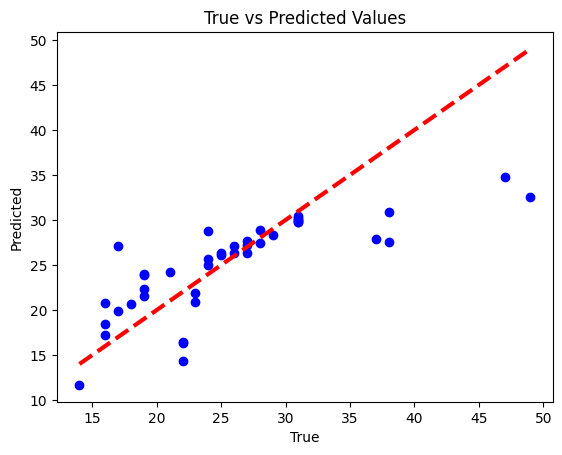

In [21]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs Predicted Values')
plt.show()